In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm
import pandas as pd
from scipy.stats import norm
import scipy.optimize as optimize
from scipy.stats.distributions import chi2
import random

#### Problem 1 (a)

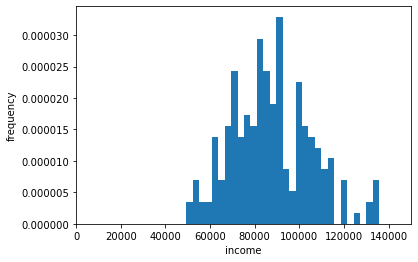

In [2]:
income = np.loadtxt("incomes.txt")

    
plt.hist(income, bins=30, density = True)
plt.xlim([0, 150000])
plt.xlabel("income")
plt.ylabel("frequency")
plt.show()

#### Problem1(b)

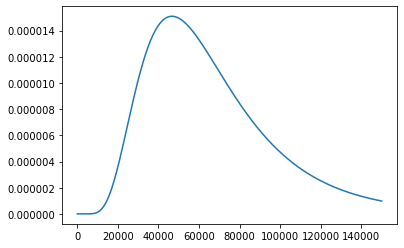

The value of the log likelihood is -2385.856997808558.


In [4]:
lognormal = lognorm.pdf(np.arange(0, 150000, 0.1),  s=0.5, scale=np.exp(11))
plt.plot(np.arange(0, 150000, 0.1), lognormal)
plt.show()
income_log_lik = (np.log(lognorm.pdf(income,  s=0.5, scale=np.exp(11)))).sum()
print(f"The value of the log likelihood is {income_log_lik}.")

#### Problem1(c)

In [5]:
def log_lik(para, *val):
    mean, std = para
    pdf = lognorm.pdf(val, s = abs(std), scale = np.exp(mean))
    sum_log = np.log(pdf).sum()
    return -sum_log

init_para = (11, 0.5)

results = optimize.minimize(log_lik, init_para, income)

In [6]:
mean_mle = results.x[0]
std_mle = results.x[1]
log_mle = results['fun']

D:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


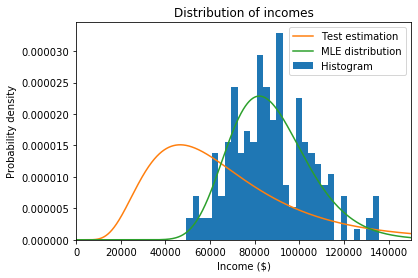

MLE estimates for mean = 11.359022999717483, standard deviation = 0.2081773187674465
Value of log likelihood function = -2241.7193013573587
[[ 2.26569237e-04 -1.90604023e-06]
 [-1.90604023e-06  1.06583888e-04]]


In [7]:
plt.hist(income, bins=30, density=True, label="Histogram")


vals = np.arange(0, 150000, 0.01)
pdf = lognorm.pdf(vals, s=0.5, scale=np.exp(11))
plt.plot(vals, pdf, label = "Test estimation")


est_pdf = lognorm.pdf(vals, s=std_mle, scale=np.exp(mean_mle))
plt.plot(vals, est_pdf, label = "MLE distribution")

plt.xlabel("Income ($)")
plt.ylabel("Probability density")
plt.title("Distribution of incomes")
plt.legend()
plt.xlim([0, 150000])
plt.show()

print(f'MLE estimates for mean = {mean_mle}, standard deviation = {std_mle}')
print(f'Value of log likelihood function = {-log_mle}')
print(results['hess_inv'])

#### Problem1(d)

In [8]:
log_hypo = np.log(lognorm.pdf(income, s=0.5, scale = np.exp(11)))
hypo_lik = np.sum(log_hypo)
LR = 2 * (-log_mle - hypo_lik)
print(f"The estimated log likelihood is {log_mle}, the null hypothesis log likelihood is {hypo_lik}, the LR ratio is {LR}")
p = chi2.sf(LR, 1) # L2 has 1 DoF more than L1 # L2 has 1 DoF more than L
print(f"p-value is {p}, and we reject the null hypothesis that the estimated distribution from lognormal is the same as the true distribution.")

The estimated log likelihood is 2241.7193013573587, the null hypothesis log likelihood is -2385.856997808558, the LR ratio is 288.2753929023984
p-value is 1.1812352336419097e-64, and we reject the null hypothesis that the estimated distribution from lognormal is the same as the true distribution.


#### Problem 1(e)

In [9]:
prob_100 = 1 - lognorm.cdf(100000, s=std_mle, scale=np.exp(mean_mle))
prob_75 = lognorm.cdf(75000, s=std_mle, scale=np.exp(mean_mle))
print(f" The probability of earning more than $100000 is {prob_100}, \n The probability of earning less than $75000 is {prob_75}")

 The probability of earning more than $100000 is 0.22986683768539584, 
 The probability of earning less than $75000 is 0.26023426214055334


#### Problem 2(a)

In [19]:
df = pd.read_csv("sick.txt")
df.head(5)

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


In [20]:
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [33]:
err = df["sick"] - df["age"] - df["children"] - df["avgtemp_winter"]

def estimate_beta(params, *args):

    
    b0, b1, b2, b3, sigma = params
    err = df["sick"] - b0 - b1 * df["age"] - b2 * df["children"] - b3 * df["avgtemp_winter"]
    pdf = norm.pdf(err, 0, abs(sigma))
    ln_pdf = np.log(pdf)
    log_lik = ln_pdf.sum()
    return -log_lik

guess = [0.8, 0.01, 0.01, 0.01, (0.01 ** 0.5)]

#while(not optimize.minimize(estimate_beta, guess, df).success) and (guess == 0):
#     guess = [random.uniform(0, 20) for i in range(5)]


# optimize.minimize(estimate_beta, guess, df)
result2 = optimize.minimize(estimate_beta, guess, df)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  df = (f(*((xk + d,) + args)) - f0) / d[k]


In [38]:
b0, b1, b2, b3, sigma = result2.x
print(f"beta_0 = {b0} \n beta_1 = {b1} \n beta_2 = {b2} \n beta_3 = {b3} \n sigma = {sigma}")
print(f"The value of log likelihood is {result2['fun']}")
print(result2["hess_inv"])

beta_0 = 0.2516463664280364 
 beta_1 = 0.012933349798804448 
 beta_2 = 0.4005020528179335 
 beta_3 = -0.009991672544409202 
 sigma = 0.003017679516380156
The value of log likelihood is -876.8650463816144
[[ 1.07037699e-06  1.14875454e-08 -2.09459882e-07 -2.54718226e-08
   8.22369846e-09]
 [ 1.14875454e-08  4.49061902e-09 -3.99195051e-08 -2.88586245e-09
   3.03259916e-10]
 [-2.09459882e-07 -3.99195051e-08  4.06813404e-07  2.60392379e-08
  -3.40589691e-09]
 [-2.54718226e-08 -2.88586245e-09  2.60392379e-08  2.24594585e-09
  -3.06484600e-10]
 [ 8.22369846e-09  3.03259916e-10 -3.40589691e-09 -3.06484600e-10
   2.33356421e-08]]


#### Problem2(b)

In [30]:
b0, b1, b2, b3, sigma = 1, 0, 0, 0, (0.01 ** 0.5)
err = df["sick"] - b0 - b1 * df["age"] - b2 * df["children"] - b3 * df["avgtemp_winter"]

hypo_pdf = norm.pdf(err, 0, sigma)
ln_hypo = np.log(hypo_pdf)
log_hypo = np.log(hypo_pdf).sum()
print('hypothesis value log likelihood', log_hypo)

log_mle = -result2['fun']
print('MLE log likelihood', log_mle)

LR2 = 2 * (log_mle - log_hypo)
print('likelihood ratio value', LR2)

pval2 = chi2.sf(LR, 5)
print('p-value = ', pval2)

hypothesis value log likelihood -2253.700688042125
MLE log likelihood 876.8650462886721
likelihood ratio value 6261.131468661594
p-value =  3.317688824237638e-60


The null hypothesis is rejected which means that we reject the beta parameters all equal to zero. In other words, those factors included in the model have effects on the sick probablity,